# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

# Reading .csv file

In [2]:
data = pd.read_csv('all_stream_info.csv')

In [3]:
data.head()

,liveStreamID,beginTime,endTime,duration,closeBy,maxLiveViewerCount,maxLiveViewerTime,privateLiveStream,receivedLikeCount,streamerType,...,isContracted,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated
0,109437538,2020-06-22 11:55:21 UTC,2020-06-22 16:37:19 UTC,16918,normalEnd,363,2020-06-22 16:28:17.87 UTC,0,11092,0,...,NaN,779,46,30,68,17,13,424.32,1108,13105
1,109441785,2020-06-22 14:55:26 UTC,2020-06-22 21:31:19 UTC,23753,normalEnd,100,2020-06-22 19:07:52.872 UTC,0,772,0,...,NaN,821,54,38,68,20,8,186.28,2318,90701
2,109438205,2020-06-22 12:20:34 UTC,2020-06-22 16:02:46 UTC,13332,disconnect,471,2020-06-22 14:53:26.692 UTC,0,19403,0,...,NaN,1605,529,223,696,60,17,81.14,1199,222376
3,109438917,2020-06-22 12:54:21 UTC,2020-06-22 14:47:27 UTC,6786,normalEnd,44,2020-06-22 14:29:13.806 UTC,0,191,0,...,NaN,96,23,24,41,12,8,389.91,432,4313
4,109442185,2020-06-22 15:18:20 UTC,2020-06-22 15:48:02 UTC,1782,normalEnd,52,2020-06-22 15:42:33.849 UTC,0,77,0,...,NaN,109,20,18,38,17,5,222.76,162,1547


In [4]:
data.shape

(3148, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148 entries, 0 to 3147
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   liveStreamID           3148 non-null   int64  
 1   beginTime              3148 non-null   object 
 2   endTime                3148 non-null   object 
 3   duration               3148 non-null   int64  
 4   closeBy                3051 non-null   object 
 5   maxLiveViewerCount     3148 non-null   int64  
 6   maxLiveViewerTime      1838 non-null   object 
 7   privateLiveStream      3148 non-null   int64  
 8   receivedLikeCount      3148 non-null   int64  
 9   streamerType           3148 non-null   int64  
 10  isShow                 3148 non-null   bool   
 11  cultureGroup           0 non-null      float64
 12  userID                 3148 non-null   object 
 13  registerCountry        3148 non-null   object 
 14  isContracted           0 non-null      float64
 15  uniq

In [6]:
data.drop(columns =['cultureGroup','isContracted','privateLiveStream','streamerType','isShow','registerCountry'],inplace=True)

In [7]:
begin = data["beginTime"].str.split(" ", n = 1, expand = True)

data['beginDate'] = begin[0]

data['begintime'] = data['beginTime'].str[11:19]

data.drop(columns =["beginTime"], inplace = True)

In [8]:
end = data["endTime"].str.split(" ", n = 1, expand = True)

data['endDate'] = end[0]

data['endtime'] = data['endTime'].str[11:19]

data.drop(columns =["endTime"], inplace = True)

In [9]:
data['maxLiveViewerTime'] = data['maxLiveViewerTime'].str[11:19]

In [10]:
hour = data["begintime"].str.split(":", n = 0, expand = True)
data['starting_hour'] = hour[0]

In [11]:
end_hour = data['endtime'].str.split(":",n = 0,expand = True)
data['ending_hour'] = end_hour[0]

In [12]:
data.head()

,liveStreamID,duration,closeBy,maxLiveViewerCount,maxLiveViewerTime,receivedLikeCount,userID,uniqueViewerCount,ios,android,...,durationGTE10min,avgViewerDuration,count,receivePointEstimated,beginDate,begintime,endDate,endtime,starting_hour,ending_hour
0,109437538,16918,normalEnd,363,16:28:17,11092,63a8b9eb-c4a6-4ff6-8aaa-5f4c6f6fd4d7,779,46,30,...,13,424.32,1108,13105,2020-06-22,11:55:21,2020-06-22,16:37:19,11,16
1,109441785,23753,normalEnd,100,19:07:52,772,6cd90016-b679-4a7b-8cc6-2c43d4590cca,821,54,38,...,8,186.28,2318,90701,2020-06-22,14:55:26,2020-06-22,21:31:19,14,21
2,109438205,13332,disconnect,471,14:53:26,19403,e4f04b19-ad3e-4c9d-7f29-6a2f6c93c842,1605,529,223,...,17,81.14,1199,222376,2020-06-22,12:20:34,2020-06-22,16:02:46,12,16
3,109438917,6786,normalEnd,44,14:29:13,191,b4dc876b-06fe-48b2-a40b-fa7f5007697a,96,23,24,...,8,389.91,432,4313,2020-06-22,12:54:21,2020-06-22,14:47:27,12,14
4,109442185,1782,normalEnd,52,15:42:33,77,8258d28e-47b9-4ce8-a765-29175b663a1d,109,20,18,...,5,222.76,162,1547,2020-06-22,15:18:20,2020-06-22,15:48:02,15,15


In [13]:
data.isnull().sum()

liveStreamID                0
duration                    0
closeBy                    97
maxLiveViewerCount          0
maxLiveViewerTime        1310
receivedLikeCount           0
userID                      0
uniqueViewerCount           0
ios                         0
android                     0
durationGTE5sec             0
durationGTE2min             0
durationGTE10min            0
avgViewerDuration        1459
count                       0
receivePointEstimated       0
beginDate                   0
begintime                   0
endDate                     0
endtime                     0
starting_hour               0
ending_hour                 0
dtype: int64

In [14]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [43]:
data.describe()

,liveStreamID,duration,maxLiveViewerCount,receivedLikeCount,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated
count,3148.00000,3148.00000,3148.00000,3148.00000,3148.00000,3148.00000,3148.00000,3148.00000,3148.00000,3148.00000,1689.00000,3148.00000,3148.00000
mean,109379665.55337,3495.86404,15.41677,358.42853,55.41677,26.28590,20.51938,44.56099,8.99492,3.93710,241.04947,126.77287,8874.37611
std,33813.10419,6651.91643,45.50518,2145.57920,160.85589,81.28065,60.53201,131.89647,26.84327,13.05720,244.36080,330.29767,47785.47211
min,109321143.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,109351751.50000,136.75000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,83.06000,0.00000,0.00000
50%,109383524.00000,1032.50000,2.00000,0.00000,2.00000,1.00000,0.00000,1.00000,0.00000,0.00000,185.30000,1.00000,0.00000
75%,109408182.25000,4801.50000,8.00000,62.00000,39.00000,20.00000,11.00000,31.00000,8.00000,3.00000,318.98000,112.25000,1501.50000
max,109442735.00000,121258.00000,493.00000,65831.00000,2385.00000,1639.00000,730.00000,2142.00000,493.00000,302.00000,2855.00000,5342.00000,1474727.00000


In [15]:
data['closeBy'] = data['closeBy'].astype(str)

In [16]:
data.columns

Index(['liveStreamID', 'duration', 'closeBy', 'maxLiveViewerCount',
       'maxLiveViewerTime', 'receivedLikeCount', 'userID', 'uniqueViewerCount',
       'ios', 'android', 'durationGTE5sec', 'durationGTE2min',
       'durationGTE10min', 'avgViewerDuration', 'count',
       'receivePointEstimated', 'beginDate', 'begintime', 'endDate', 'endtime',
       'starting_hour', 'ending_hour'],
      dtype='object')

# Data Visulaization

In [17]:
starting = data.groupby(["starting_hour"],as_index=False)["liveStreamID"].count().sort_values('starting_hour')

fig = px.bar(starting,x='starting_hour', y='liveStreamID',color = 'starting_hour')
fig.update_layout(title_text='Hour wise analysis',title_x=0.5
                  ,template='seaborn')
fig.show()

In [18]:
ending = data.groupby(["ending_hour"],as_index=False)["liveStreamID"].count().sort_values('ending_hour')

fig = px.bar(ending,x='ending_hour', y='liveStreamID')
fig.update_layout(title_text=' ending Hour wise analysis',title_x=0.5
                  ,template='seaborn')
fig.show()

In [19]:
close = pd.DataFrame(data.closeBy.value_counts().reset_index())
px.pie(close,values='closeBy',names='index',
      title='Percentage counts of closing the stream',
      color_discrete_sequence=px.colors.diverging.PiYG)

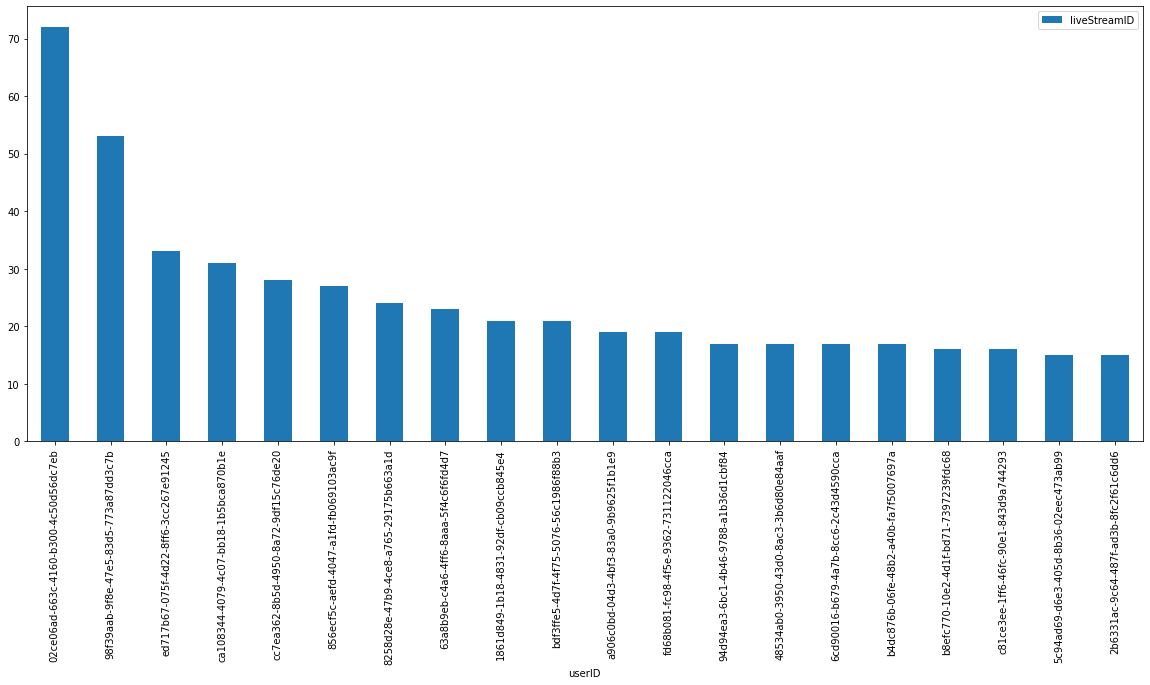

In [20]:
# top 20 streams have highest duration period
data.groupby(data['userID'])['liveStreamID'].count().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(20,8))
plt.legend()
plt.show()

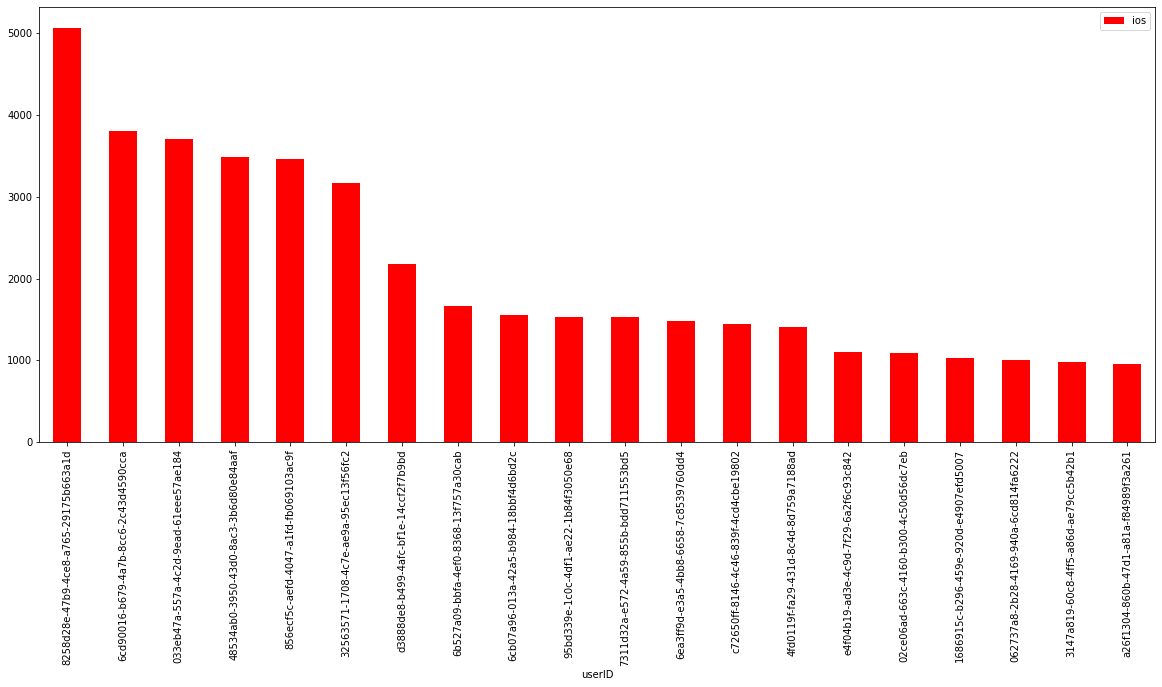

In [21]:
data.groupby(data['userID'])['ios'].sum().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(20,8),color ='red')
plt.legend()
plt.show()

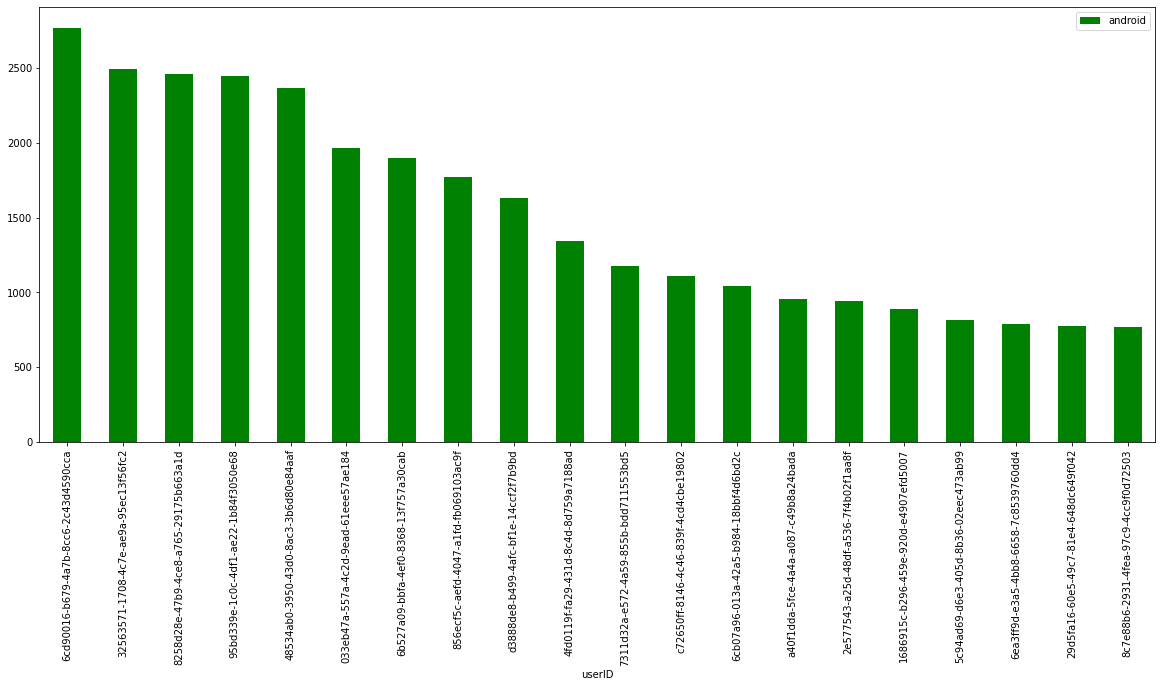

In [22]:
data.groupby(data['userID'])['android'].sum().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(20,8),color = 'green')
plt.legend()
plt.show()

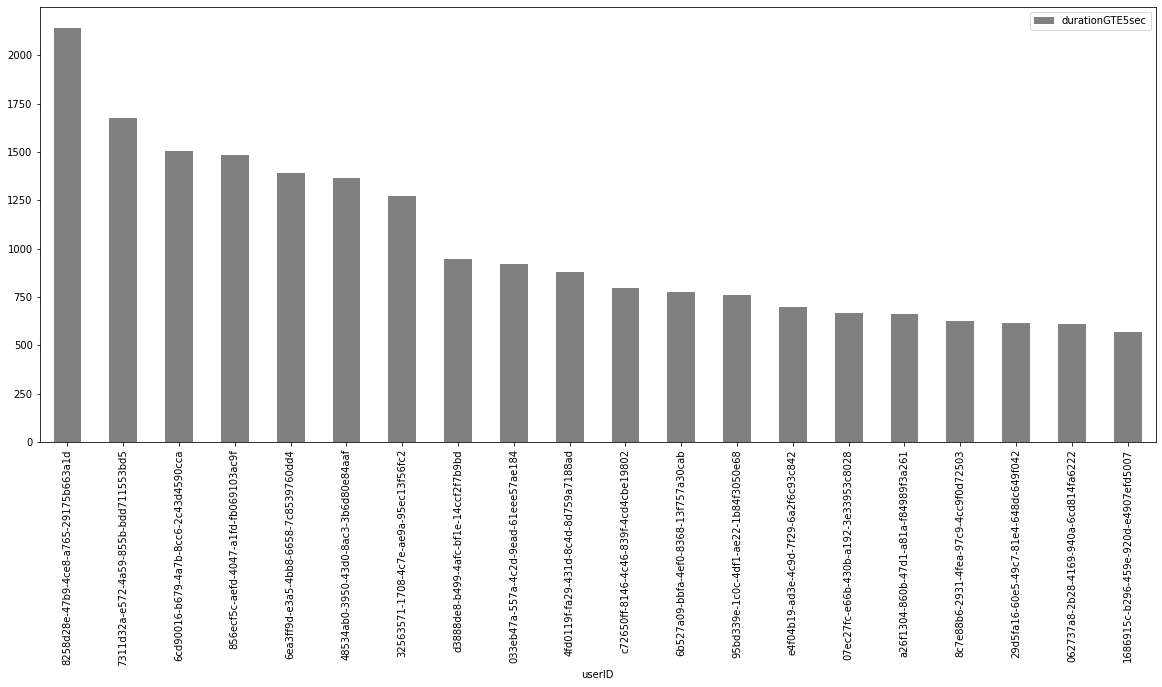

In [23]:
data.groupby(data['userID'])['durationGTE5sec'].max().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(20,8),color = 'grey')
plt.legend()
plt.show()

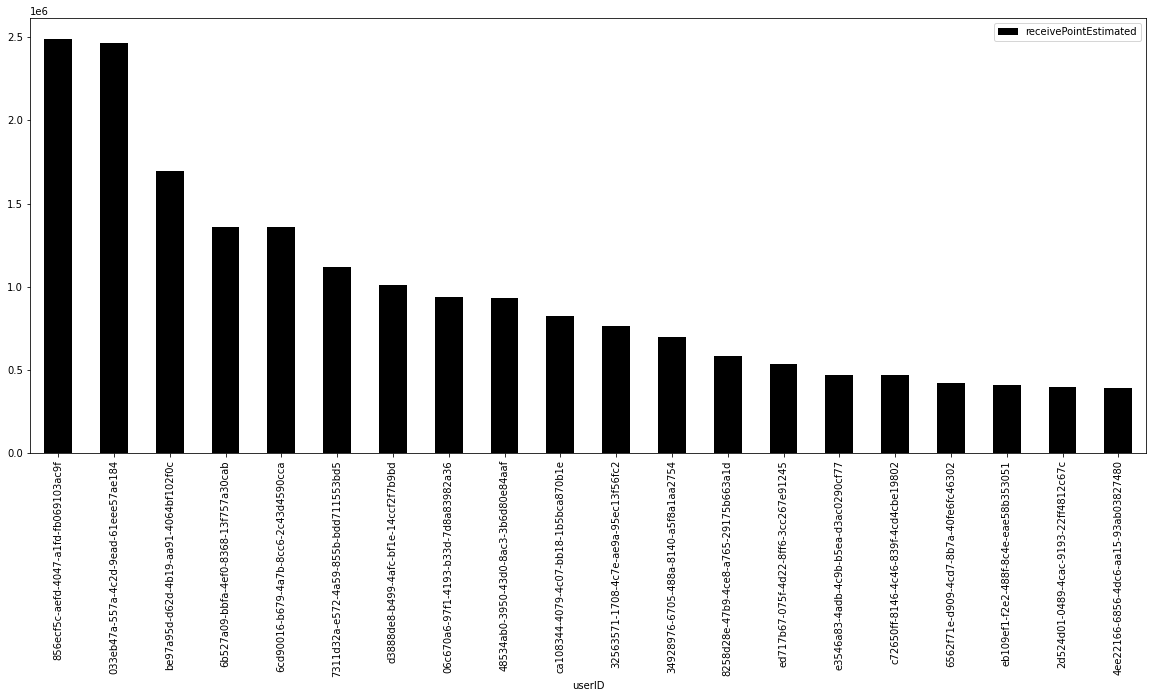

In [24]:
data.groupby(data['userID'])['receivePointEstimated'].sum().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(20,8),color = 'black')
plt.legend()
plt.show()

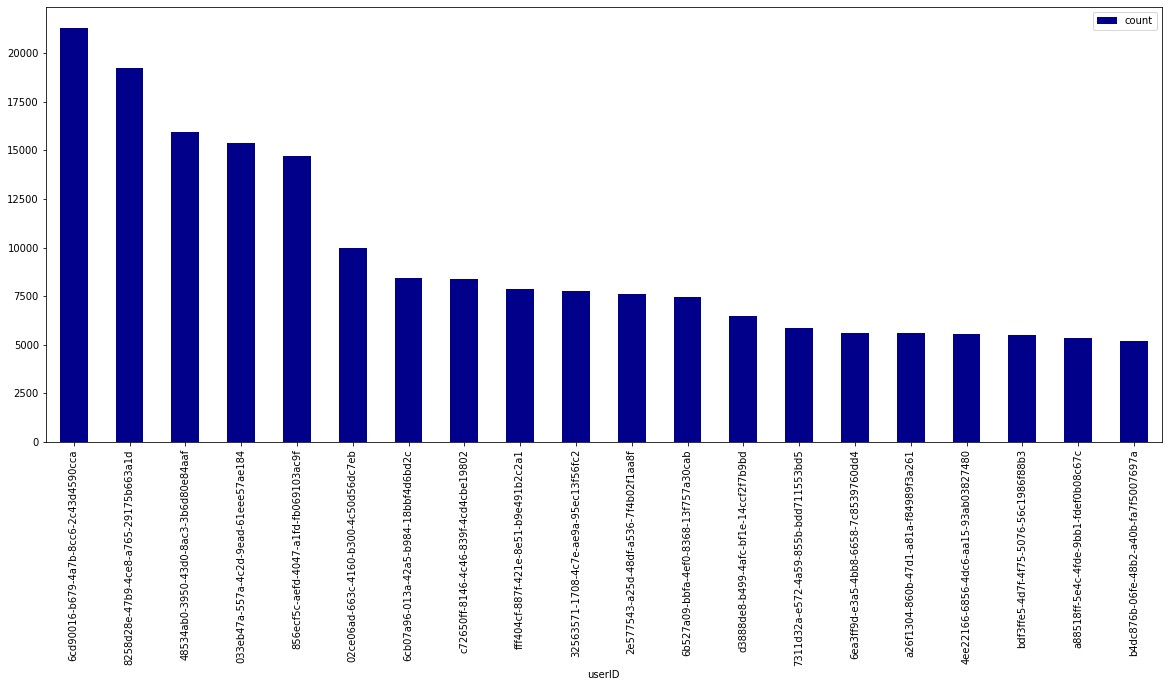

In [25]:
data.groupby(data['userID'])['count'].sum().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(20,8),color = 'darkblue')
plt.legend()
plt.show()

In [26]:
user=data.groupby('userID')
result=user.agg({'duration':np.sum, 'count': ['sum'],'ios':['sum'],'android':['sum'],'durationGTE5sec':['max'],
                'durationGTE2min':['max'],'durationGTE10min':['max'],'receivePointEstimated':['sum'],
                'maxLiveViewerCount':['max']}).reset_index()
result.columns = ["_".join(x) for x in result.columns.ravel()]

result.rename(columns={'duration_sum':'duration','count_sum':'count','ios_sum':'ios','userID_':'userID',
                      'android_sum':'android','durationGTE5sec_max':'durationGTE5sec','durationGTE2min_max':'durationGTE2min',
                      'durationGTE10min_max':'durationGTE10min','receivePointEstimated_sum':'receivePointEstimated',
                      'maxLiveViewerCount_max':'maxLiveViewerCount'}, inplace = True)

C:\Users\VENKATESH\anaconda3\envs\cust\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



In [27]:
result['receivePointEstimated'].quantile(.80)

1372.4000000000046

In [28]:
result['target'] = ''

In [29]:
for i in range(len(result)):
    if result.receivePointEstimated.iloc[i] >= result.receivePointEstimated.quantile(.80):
        result.target.iloc[i] = 1
    else:
        result.target.iloc[i] = 0

In [30]:
result['target'] =  result['target'].astype(int)

In [31]:
result.head()

,userID,duration,count,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,receivePointEstimated,maxLiveViewerCount,target
0,0009683e-d51d-4cf8-a317-76c828edd88e,47228,410,140,113,61,5,2,2332,44,1
1,007ae77f-a73b-46ed-a2ad-fa197b2656a3,87,0,0,0,0,0,0,0,0,0
2,01ccb26b-9af4-47d8-8384-42b3e15c1249,43834,3120,482,338,191,63,46,50450,63,1
3,0201168e-6ea3-4e32-86c0-446d5dd3d824,18191,432,95,142,129,6,3,12290,122,1
4,0212ceea-7717-4f3b-8e34-a9437c2b2e0e,1332,0,0,0,0,0,0,0,0,0


In [32]:
dataset = result.drop('userID',axis = 1)

In [33]:
dataset.head()

,duration,count,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,receivePointEstimated,maxLiveViewerCount,target
0,47228,410,140,113,61,5,2,2332,44,1
1,87,0,0,0,0,0,0,0,0,0
2,43834,3120,482,338,191,63,46,50450,63,1
3,18191,432,95,142,129,6,3,12290,122,1
4,1332,0,0,0,0,0,0,0,0,0


# Preparing Model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [35]:
#spliting data to train and test data
X = dataset.drop('target',axis=1)
Y = dataset.target.values

In [36]:
columns = X.columns

In [37]:
ss = StandardScaler()

# ss, now u go and study these numeric columns --> i.e. fit() over it
ss.fit(X[columns])

# ss, now appear for the test
X[columns] = ss.transform(X[columns])
X

,duration,count,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,receivePointEstimated,maxLiveViewerCount
0,1.33122,0.00681,0.16184,0.19165,0.07436,-0.09573,-0.09436,-0.15594,0.41246
1,-0.40124,-0.24889,-0.23391,-0.25576,-0.28781,-0.25205,-0.22560,-0.17014,-0.33475
2,1.20649,1.69690,1.12859,1.08252,0.84619,1.71755,2.79284,0.13711,0.73512
3,0.26409,0.02053,0.03463,0.30648,0.47809,-0.06447,-0.02874,-0.09529,1.73706
4,-0.35549,-0.24889,-0.23391,-0.25576,-0.28781,-0.25205,-0.22560,-0.17014,-0.33475
...,...,...,...,...,...,...,...,...,...
995,-0.39786,-0.24889,-0.23391,-0.25576,-0.28781,-0.25205,-0.22560,-0.17014,-0.33475
996,-0.39577,-0.24889,-0.23391,-0.25576,-0.28781,-0.25205,-0.22560,-0.17014,-0.33475
997,1.29326,0.09350,0.66218,0.42130,0.54933,0.46701,0.23373,-0.11348,-0.19889
998,-0.40036,-0.24889,-0.23391,-0.25576,-0.28781,-0.25205,-0.22560,-0.17014,-0.33475


In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.30,stratify=Y,random_state=42)

In [39]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)

In [40]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import classification_report
print("Classification Report:\n")
print(classification_report(y_test,y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       240
           1       0.96      0.73      0.83        60

    accuracy                           0.94       300
   macro avg       0.95      0.86      0.90       300
weighted avg       0.94      0.94      0.94       300



In [42]:
print("Confusion Matrix:\n")
confusion_matrix(y_test,y_pred)

Confusion Matrix:



array([[238,   2],
       [ 16,  44]], dtype=int64)

In [ ]:
import joblib
    
joblib.dump(model,"model.pickle")
joblib.dump(ss,"scaler.pickle")

# End of Project